In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("./mosquito_Indicator.csv")
df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [58]:
df.isnull().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [59]:
df['date'] = pd.to_datetime(df['date'])
# df 의 date 열을 datetime 으로 변환하고 그 변환한걸 다시 df의 date에 저장한다
# 다음 작업인 월별로 그룹화하여(dt.month), 월에 대한 'mosquito_Indicator' 의 평균값을 구하기 위한 작업이다.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1342 non-null   datetime64[ns]
 1   mosquito_Indicator  1342 non-null   float64       
 2   rain(mm)            1342 non-null   float64       
 3   mean_T(℃)           1342 non-null   float64       
 4   min_T(℃)            1342 non-null   float64       
 5   max_T(℃)            1342 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 63.0 KB


In [60]:
monthly_mosquito = df.groupby(df['date'].dt.month)['mosquito_Indicator'].mean()
monthly_mosquito
# date 열을 월 기준으로 가져오기위해 df의 date 데이터프레임에 dt.month 를 해주고
# groupby 를 하여 'mosquito_Indicator' 의 해당값들의 평균값을 구해서 monthly_mosquito 시리즈에 저장해준다.

date
1       4.167021
2       4.160440
3       6.294737
4      24.334444
5     261.729032
6     611.472000
7     752.914173
8     285.771200
9     537.325581
10    218.513889
11      8.054369
12      4.890076
Name: mosquito_Indicator, dtype: float64

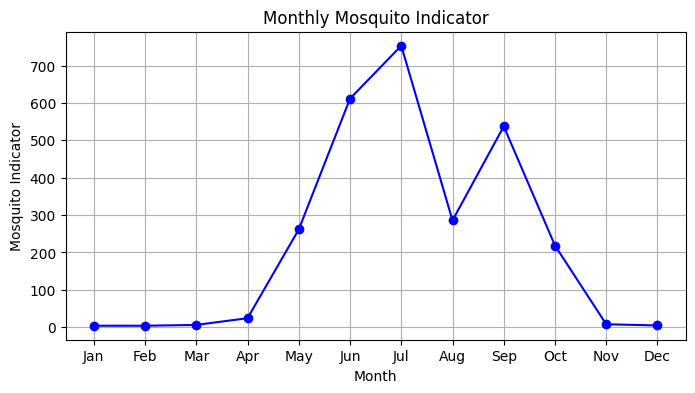

In [61]:
plt.figure(figsize=(8, 4))  # 그래프 사이즈 설정
plt.plot(monthly_mosquito, marker='o', color='b', linestyle='-')   # 선 그래프를 그리는 함수
# monthly_mosquito 이라는 데이터를 가져와 데이터 포인트를 나타내는 마커의 모양을 o 으로 설정
# 선의 색상을 파란색으로 설정, 선의 스타일을 실선으로 설정
plt.title('Monthly Mosquito Indicator')  # 제목설정
plt.xlabel('Month') # x축 설정
plt.ylabel('Mosquito Indicator') # y축 설정
plt.grid(True)  # 격자 라인을 표시
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [62]:
monthly_rainfall = df.groupby(df['date'].dt.month)['rain(mm)'].sum().reset_index()
monthly_rainfall

,date,rain(mm)
0,1,23.4
1,2,75.6
2,3,83.7
3,4,239.2
4,5,436.4
5,6,398.8
6,7,1792.7
7,8,757.2
8,9,348.3
9,10,259.8


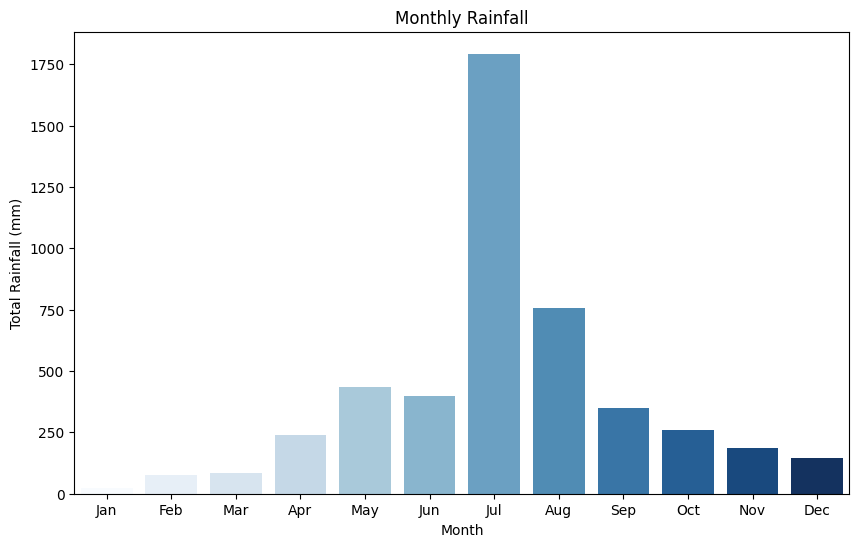

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_rainfall, x='date', y='rain(mm)', palette='Blues', hue='date', legend=False)
plt.title('Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [77]:
monthly_mean_temp = df.groupby(df['date'].dt.month)['mean_T(℃)'].mean().reset_index()
monthly_mean_temp
# df의 date 열을 월별로 그룹화하여 평균기온의 평균값을 구하고 인덱스를 초기화한 결과를 monthly_mean_temp 시리즈에 저장 해준다.

,date,mean_T(℃)
0,1,-2.277660
1,2,-0.132967
2,3,7.300000
3,4,13.013333
4,5,19.158871
5,6,22.999200
6,7,26.644094
7,8,27.604000
8,9,22.297674
9,10,16.095370


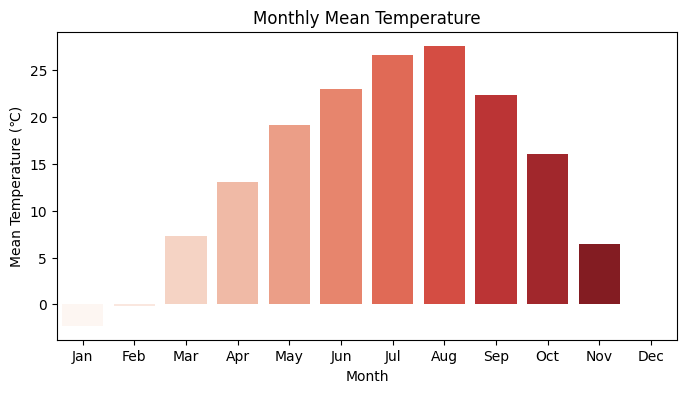

In [81]:
plt.figure(figsize=(8, 4))
sns.barplot(data=monthly_mean_temp, x='date', y='mean_T(℃)', palette='Reds', hue='date', legend=False)
# monthly_mean_temp 라는 데이터 프레임을 사용하고
# x축은 date, y축은 mean_T(℃), 팔레트에 색깔은 reds 로 설정한다
# 월별로 나오는 그래프를 그리기때문에 hue 를 date로 기준을 정해준다
# 범례를 나오지않기 위해 False 로 설정해준다
plt.title('Monthly Mean Temperature') 
plt.xlabel('Month')
plt.ylabel('Mean Temperature (℃)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#sns.barplot(data=monthly_mean_temp, x='date', y='mean_T(℃)', palette='Reds', hue='date', legend=False)

In [78]:
# https://munhwa.com/news/view.html?no=2023062301032527098001